In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

################# IMPORT HERE THE LIBs ################# 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hpc-workflow-data/execution_output.csv
/kaggle/input/superdf-workflow-exec/execution_output_1.csv
/kaggle/input/epigenomics-exectuion-output/epigenomics_execution_output.csv
/kaggle/input/execution/execution_output.csv
/kaggle/input/blast-exectuion-output/blast_execution_output.csv
/kaggle/input/montage-exectuion-output/montage_execution_output.csv


In [4]:
df1 = pd.read_csv('/kaggle/input/epigenomics-exectuion-output/epigenomics_execution_output.csv', sep=',')

In [5]:
df2 = pd.read_csv('/kaggle/input/superdf-workflow-exec/execution_output_1.csv', sep=',')
df2 = df2.drop(columns = ['flops_per_task', 'memory_req_task', 'trace_size'])
df2.columns = ['run_id', 'host_name', 'num_of_cores', 'cores_allocated_task',
       'num_of_tasks', 'avg_task_execution', 'tasks_failed', 'compute_time',
       'io_input_time', 'io_output_time', 'comm_comp_ratio',
       'total_bytes_read', 'total_bytes_write', 'completion_date', 'power']
df2.head()

,run_id,host_name,num_of_cores,cores_allocated_task,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
0,extk-104,BatchHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,50.0643
1,extk-104,CloudHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,50.0643
2,extk-104,CloudNode1,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,267.7030
3,extk-104,CloudNode2,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,50.0643
4,extk-104,CloudNode3,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,104,0.51598,0,53.6619,0.007024,0.006539,4485.9,33570883000,632189000,7773.17,50.0643


In [6]:
df = pd.concat([df1, df2], ignore_index = True)
df.head()

,run_id,host_name,num_of_cores,cores_allocated_task,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
0,extk-97,BatchHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,97,10.268,0,996.0,1.39397,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,50.0041
1,extk-97,CloudHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,97,10.268,0,996.0,1.39397,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,50.0041
2,extk-97,CloudNode1,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,97,10.268,0,996.0,1.39397,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,296.7550
3,extk-97,CloudNode2,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,97,10.268,0,996.0,1.39397,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,50.0041
4,extk-97,CloudNode3,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,97,10.268,0,996.0,1.39397,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,50.0041


In [7]:
print(f'DF1 SHAPE: {df1.shape}')
print(f'DF2 SHAPE: {df2.shape}')
print(f'DF SHAPE: {df.shape}')

DF1 SHAPE: (50400, 15)
DF2 SHAPE: (41364, 15)
DF SHAPE: (91764, 15)


# Data Analisys

In [8]:
df.head()

,run_id,host_name,num_of_cores,cores_allocated_task,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
0,extk-97,BatchHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,97,10.268,0,996.0,1.39397,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,50.0041
1,extk-97,CloudHeadNode,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,97,10.268,0,996.0,1.39397,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,50.0041
2,extk-97,CloudNode1,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,97,10.268,0,996.0,1.39397,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,296.7550
3,extk-97,CloudNode2,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,97,10.268,0,996.0,1.39397,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,50.0041
4,extk-97,CloudNode3,28,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,97,10.268,0,996.0,1.39397,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,50.0041


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91764 entries, 0 to 91763
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   run_id                91764 non-null  object 
 1   host_name             91764 non-null  object 
 2   num_of_cores          91764 non-null  int64  
 3   cores_allocated_task  91764 non-null  object 
 4   num_of_tasks          91764 non-null  int64  
 5   avg_task_execution    91764 non-null  float64
 6   tasks_failed          91764 non-null  int64  
 7   compute_time          91764 non-null  float64
 8   io_input_time         91764 non-null  float64
 9   io_output_time        91764 non-null  float64
 10  comm_comp_ratio       91764 non-null  float64
 11  total_bytes_read      91764 non-null  uint64 
 12  total_bytes_write     91764 non-null  uint64 
 13  completion_date       91764 non-null  float64
 14  power                 91764 non-null  float64
dtypes: float64(7), int6

In [10]:
df.shape

(91764, 15)

In [11]:
df.dtypes

run_id                   object
host_name                object
num_of_cores              int64
cores_allocated_task     object
num_of_tasks              int64
avg_task_execution      float64
tasks_failed              int64
compute_time            float64
io_input_time           float64
io_output_time          float64
comm_comp_ratio         float64
total_bytes_read         uint64
total_bytes_write        uint64
completion_date         float64
power                   float64
dtype: object

In [12]:
df_numeric_types = df.select_dtypes(include = np.number)
df_numeric_types

,num_of_cores,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
0,28,97,10.268000,0,996.0,1.393970,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,50.0041
1,28,97,10.268000,0,996.0,1.393970,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,50.0041
2,28,97,10.268000,0,996.0,1.393970,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,296.7550
3,28,97,10.268000,0,996.0,1.393970,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,50.0041
4,28,97,10.268000,0,996.0,1.393970,0.874796,7796.67,18446744073709551519,18446744073709551519,121058.0,50.0041
...,...,...,...,...,...,...,...,...,...,...,...,...
91759,28,7398,0.023068,163,166.9,0.006523,0.007629,4452.38,18446744073709544218,18446744073709544218,3801600.0,790.5590
91760,28,7398,0.023068,163,166.9,0.006523,0.007629,4452.38,18446744073709544218,18446744073709544218,3801600.0,789.7010
91761,28,7398,0.023068,163,166.9,0.006523,0.007629,4452.38,18446744073709544218,18446744073709544218,3801600.0,50.0001
91762,28,7398,0.023068,163,166.9,0.006523,0.007629,4452.38,18446744073709544218,18446744073709544218,3801600.0,50.0001


In [13]:
df_object_dtypes = df.select_dtypes(object)
df_object_dtypes

,run_id,host_name,cores_allocated_task
0,extk-97,BatchHeadNode,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
1,extk-97,CloudHeadNode,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
2,extk-97,CloudNode1,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
3,extk-97,CloudNode2,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
4,extk-97,CloudNode3,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
...,...,...,...
91759,extk-7398,Node6,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
91760,extk-7398,Node7,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
91761,extk-7398,Node8,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...
91762,extk-7398,Node9,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...


In [14]:
df_numeric_types.describe()

,num_of_cores,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,completion_date,power
count,91764.0,91764.000000,91764.000000,91764.000000,91764.000000,91764.000000,91764.000000,9.176400e+04,9.176400e+04,9.176400e+04,9.176400e+04,91764.000000
mean,28.0,5873.494704,3.865998,18.738721,3006.649854,2.144102,0.291762,1.379005e+04,1.819345e+19,1.819345e+19,1.128961e+06,162.208331
std,0.0,3882.902685,97.439368,52.360199,3744.646474,21.122561,0.386485,2.128338e+05,2.146688e+18,2.146688e+18,1.528942e+06,233.912141
min,28.0,11.000000,0.000000,0.000000,0.000000,0.006505,0.006505,1.763680e-01,3.630000e+06,1.923999e+06,2.562760e+00,50.000100
25%,28.0,2497.000000,0.110176,0.000000,728.200000,0.006589,0.009350,4.469520e+03,1.844674e+19,1.844674e+19,1.436340e+05,50.000600
50%,28.0,5678.000000,0.304562,0.000000,1272.300000,0.692134,0.094514,6.064100e+03,1.844674e+19,1.844674e+19,1.860800e+05,50.003200
75%,28.0,8865.000000,0.869505,0.000000,4910.400000,1.407470,0.832692,7.724060e+03,1.844674e+19,1.844674e+19,1.954160e+06,52.666700
max,28.0,14047.000000,4886.130000,168.000000,64903.800000,533.818000,1.109480,6.432640e+06,1.844674e+19,1.844674e+19,5.186430e+06,792.881000


# Data Visualization

In [15]:
df_numeric_types.columns

Index(['num_of_cores', 'num_of_tasks', 'avg_task_execution', 'tasks_failed',
       'compute_time', 'io_input_time', 'io_output_time', 'comm_comp_ratio',
       'total_bytes_read', 'total_bytes_write', 'completion_date', 'power'],
      dtype='object')

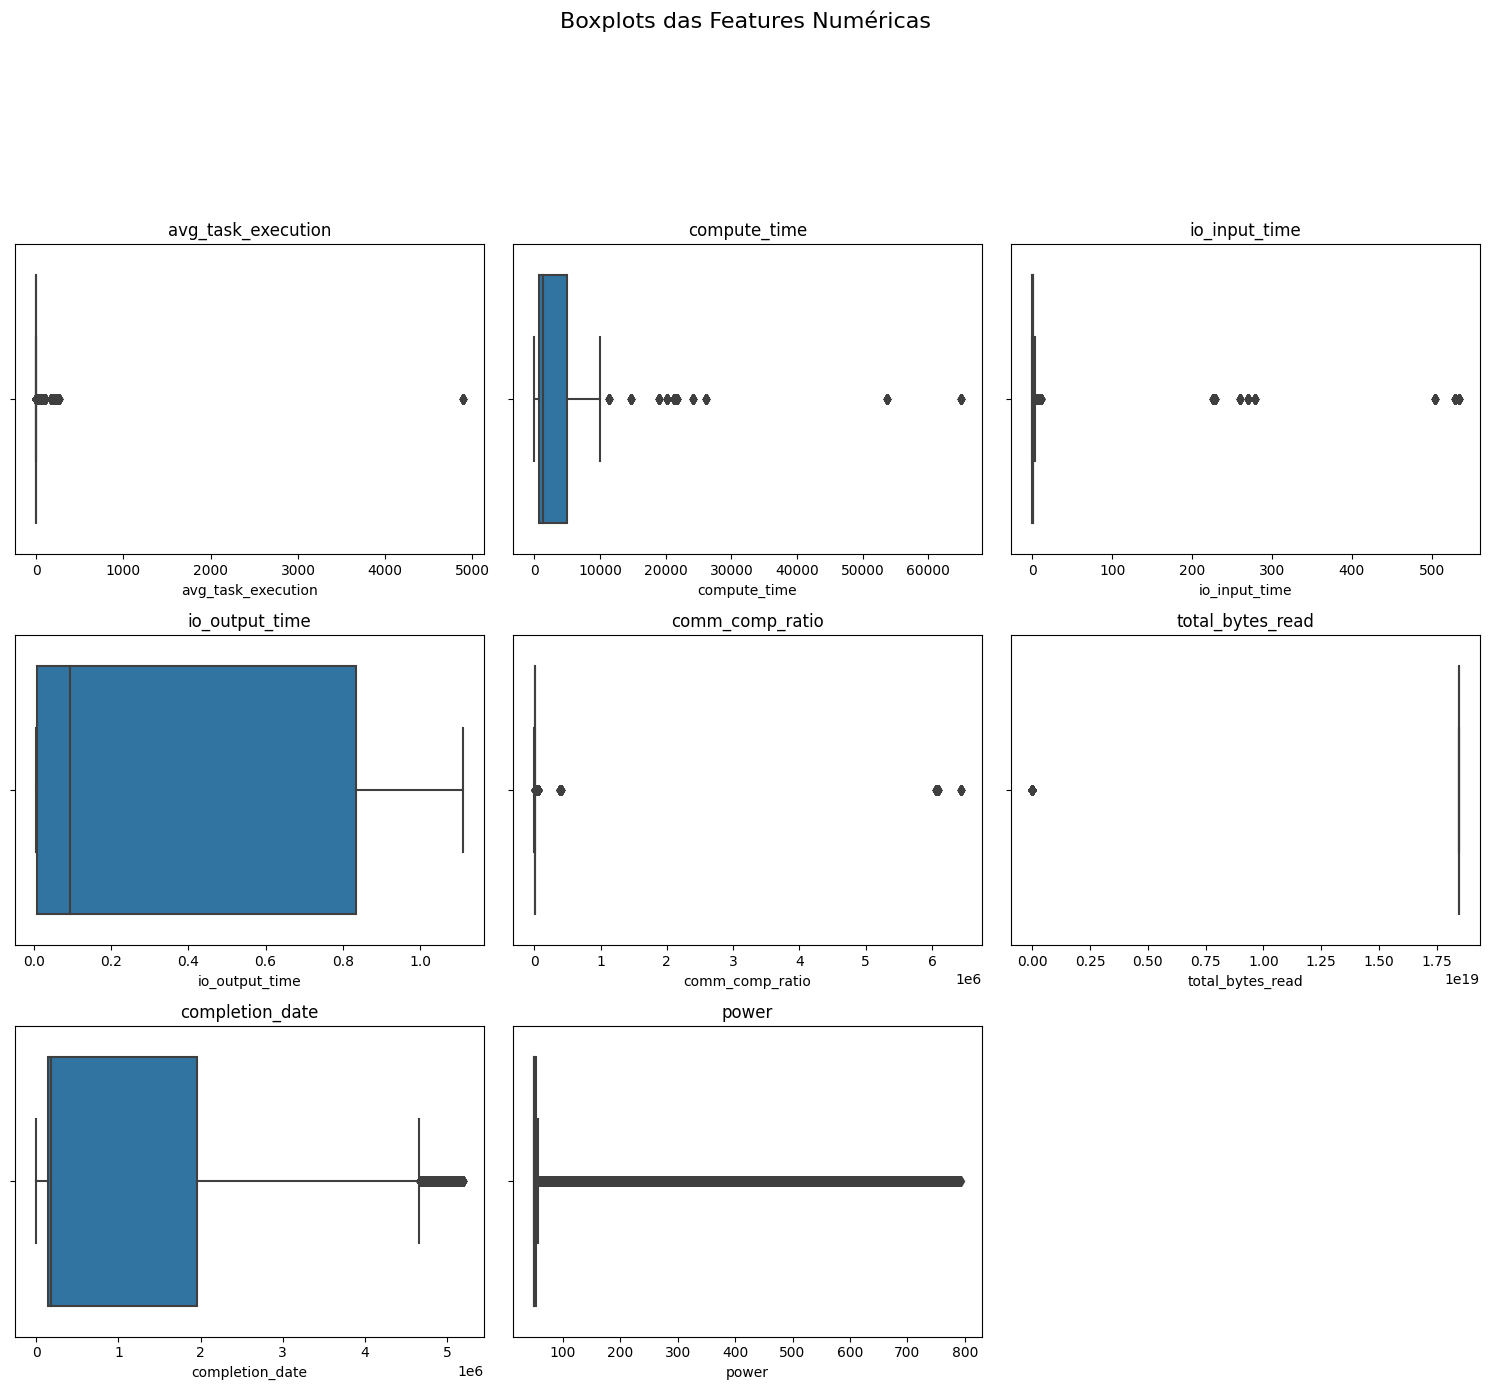

In [16]:
new_cols_features = df_numeric_types.drop(columns = ['num_of_cores', 'num_of_tasks', 'tasks_failed', 'total_bytes_write'])
columns_to_plot = new_cols_features.columns

num_features = len(columns_to_plot)

ncols_grid = min(num_features, 3)
nrows_grid = (num_features + ncols_grid - 1)

fig, axes = plt.subplots(nrows = nrows_grid, ncols = ncols_grid, figsize = (ncols_grid * 5, nrows_grid * 4))
fig.suptitle('Boxplots das Features Numéricas', fontsize=16, y=1.02)

if num_features == 1:
    axes_list = [axes]
else:
    axes_list = axes.flatten()
    
# Iterar sobre cada coluna e criar um boxplot em seu respectivo subplot
for i, col_name in enumerate(columns_to_plot):
    current_ax = axes_list[i]
    sns.boxplot(data=new_cols_features, x=col_name, ax=current_ax) # Cria boxplot horizontal para a coluna `col_name`
    current_ax.set_title(f'{col_name}')
    # current_ax.set_xlabel(col_name) # O nome da coluna já está no X por padrão com x=col_name
    # current_ax.set_ylabel('')      # Para boxplots horizontais, o eixo Y não tem um significado direto

# Ocultar eixos não utilizados (se o número de features não preencher a grade perfeitamente)
for j in range(num_features, len(axes_list)):
    fig.delaxes(axes_list[j])

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta o layout para evitar sobreposições e dar espaço ao suptitle
plt.show()

    

## Feature Engineering

In [17]:
count = 1
for index in df.index:
    selected_index = df[df['run_id'].str.contains(r'^extk', regex=True)].head(36).index
    df.loc[selected_index, 'run_id'] = 'simu-' + str(count)
    count += 1

In [18]:
# agregando os dados por run_id
agg_df = df.groupby("run_id").agg({
    "host_name": "first",             # Nome do host (primeiro encontrado para o run_id)
    "num_of_cores": "sum",            # Total de núcleos usados na execução
    "cores_allocated_task": "sum",    # Soma dos núcleos alocados por tarefa
    "num_of_tasks": "first",          # Número de tarefas (mesmo valor para todas as entradas do run_id)
    "avg_task_execution": "first",    # Média de execução da tarefa (primeiro valor encontrado para o run_id)
    "tasks_failed": "sum",            # Total de tarefas falhas
    "compute_time": "mean",           # Tempo médio de computação
    "io_input_time": "sum",           # Tempo total de E/S de entrada
    "io_output_time": "sum",          # Tempo total de E/S de saída
    "comm_comp_ratio": "mean",        # Razão média entre comunicação e computação
    "total_bytes_read": "first",      # Total de bytes lidos (primeiro valor encontrado para o run_id)
    "total_bytes_write": "first",     # Total de bytes escritos (primeiro valor encontrado para o run_id)
    "power": 'sum',                   # Consumo total de energia
    "completion_date": "first"        # Data de conclusão (mesma para todas as entradas do run_id)
}).reset_index()

In [19]:
agg_df['cores_allocated_task'] = agg_df['cores_allocated_task'].str.split(';').apply(lambda x: [int(val) for val in x])
agg_df['sum_cores_allocated'] = agg_df['cores_allocated_task'].apply(sum)

In [20]:
df_numeric_types_agg = agg_df.select_dtypes(include = np.number)
df_numeric_types_agg

,num_of_cores,num_of_tasks,avg_task_execution,tasks_failed,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,power,completion_date,sum_cores_allocated
0,1008,97,10.268000,0,996.0,50.182920,31.492656,7796.67,18446744073709551519,18446744073709551519,2046.8985,121058.0,3807
1,1008,10065,0.609528,0,6134.9,78.664680,5.555520,7874.49,18446744073709541551,18446744073709541551,5197.9769,186508.0,362655
2,1008,10887,0.914770,0,9959.1,39.781440,32.267340,7804.90,18446744073709540729,18446744073709540729,5452.9929,184165.0,392247
3,1008,6375,1.509850,0,9625.3,94.952160,32.051448,7699.91,18446744073709545241,18446744073709545241,4462.3761,153417.0,229815
4,1008,6385,0.155991,0,996.0,24.916824,33.829416,7583.87,18446744073709545231,18446744073709545231,4416.6704,155297.0,230175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,1008,6325,0.157470,0,996.0,34.117344,37.022760,7536.83,18446744073709545291,18446744073709545291,4439.9471,151618.0,228015
2545,1008,6335,0.157222,0,996.0,29.625804,5.971680,7686.04,18446744073709545281,18446744073709545281,4382.2874,157116.0,228375
2546,1008,6347,1.431100,0,9083.2,24.916824,3.402504,7597.05,18446744073709545269,18446744073709545269,4436.9761,151864.0,228807
2547,1008,6355,0.778946,0,4950.2,70.164360,5.774724,7628.17,18446744073709545261,18446744073709545261,4411.2064,155781.0,229095


# Pre-Processing

## avg_task_execution

In [21]:
Q1_avg_task_execution = df_numeric_types_agg['avg_task_execution'].quantile(0.25)
Q3_avg_task_execution = df_numeric_types_agg['avg_task_execution'].quantile(0.75)

IQR = Q3_avg_task_execution - Q1_avg_task_execution
lower_limit = Q1_avg_task_execution - 1.5 * IQR
upper_limit = Q3_avg_task_execution + 1.5 * IQR

In [22]:
outlier_condition = (df_numeric_types_agg['avg_task_execution'] < lower_limit) | (df_numeric_types_agg['avg_task_execution'] > upper_limit)

In [23]:
no_outliers_values = df_numeric_types_agg.loc[~outlier_condition, 'avg_task_execution']
mean_replacement = no_outliers_values.mean()

In [24]:
df_numeric_types_agg_treated = df_numeric_types_agg.copy()
df_numeric_types_agg_treated.loc[outlier_condition, 'avg_task_execution'] = mean_replacement

<Axes: xlabel='avg_task_execution'>

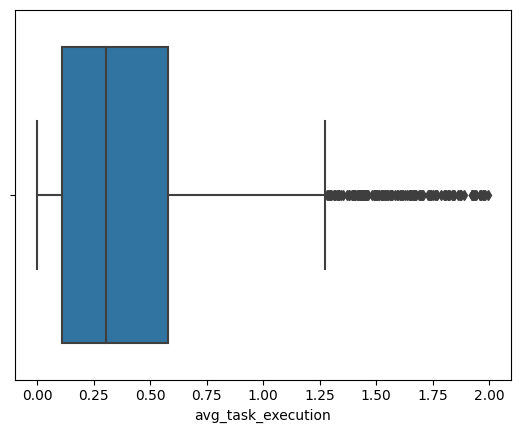

In [25]:
sns.boxplot(data = df_numeric_types_agg_treated, x = 'avg_task_execution')

## comm_comp_ratio

In [26]:
Q1_comm_comp_ratio = df_numeric_types_agg['comm_comp_ratio'].quantile(0.25)
Q3_comm_comp_ratio = df_numeric_types_agg['comm_comp_ratio'].quantile(0.75)

IQR = Q3_comm_comp_ratio - Q1_comm_comp_ratio
lower_limit = Q1_comm_comp_ratio - 1.5 * IQR
upper_limit = Q3_comm_comp_ratio + 1.5 * IQR

In [27]:
outlier_condition = (df_numeric_types_agg['comm_comp_ratio'] < lower_limit) | (df_numeric_types_agg['comm_comp_ratio'] > upper_limit)

In [28]:
no_outliers_values = df_numeric_types_agg.loc[~outlier_condition, 'comm_comp_ratio']
mean_replacement = no_outliers_values.mean()

In [29]:
df_numeric_types_agg_treated.loc[outlier_condition, 'comm_comp_ratio'] = mean_replacement

<Axes: xlabel='comm_comp_ratio'>

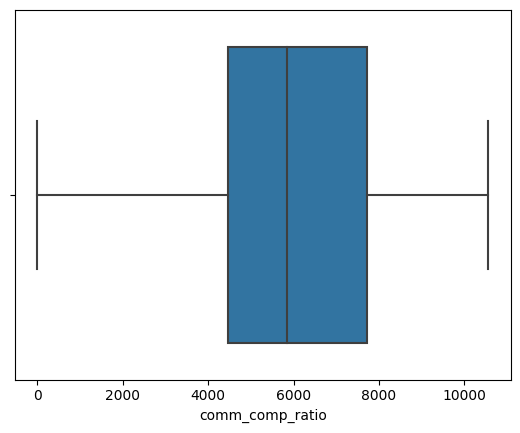

In [30]:
sns.boxplot(data = df_numeric_types_agg_treated, x = 'comm_comp_ratio')

In [31]:
df_numeric_types_agg_treated['power'] = df_numeric_types_agg_treated.loc[:, 'power'].apply(np.log10)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='power', ylabel='Count'>

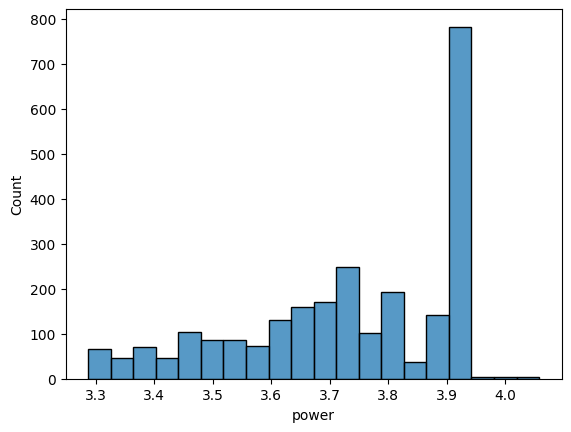

In [32]:
sns.histplot(data = df_numeric_types_agg_treated, x = 'power', bins=20)

In [33]:
df_numeric_types_agg_treated['completion_date'] = df_numeric_types_agg_treated.loc[:, 'completion_date'].apply(np.log10)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='completion_date', ylabel='Count'>

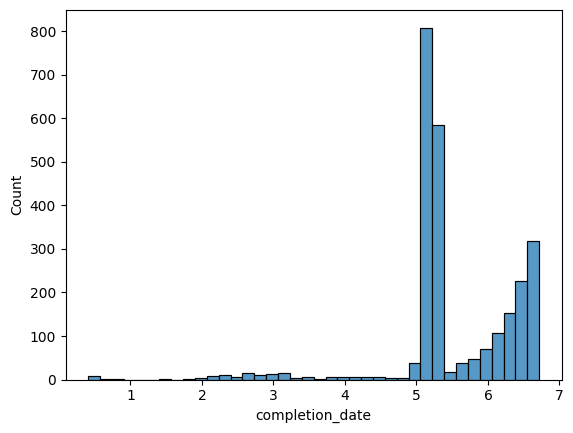

In [34]:
sns.histplot(data = df_numeric_types_agg_treated, x = 'completion_date')

# Machine Learning

In [35]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import parse_version

from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [36]:
df_numeric_types_agg_treated.columns

Index(['num_of_cores', 'num_of_tasks', 'avg_task_execution', 'tasks_failed',
       'compute_time', 'io_input_time', 'io_output_time', 'comm_comp_ratio',
       'total_bytes_read', 'total_bytes_write', 'power', 'completion_date',
       'sum_cores_allocated'],
      dtype='object')

In [37]:
df3 = df_numeric_types_agg_treated.drop(columns=['num_of_cores', 'num_of_tasks', 'avg_task_execution', 'tasks_failed'], axis=1)
df3

,compute_time,io_input_time,io_output_time,comm_comp_ratio,total_bytes_read,total_bytes_write,power,completion_date,sum_cores_allocated
0,996.0,50.182920,31.492656,7796.67,18446744073709551519,18446744073709551519,3.311096,5.082993,3807
1,6134.9,78.664680,5.555520,7874.49,18446744073709541551,18446744073709541551,3.715834,5.270697,362655
2,9959.1,39.781440,32.267340,7804.90,18446744073709540729,18446744073709540729,3.736635,5.265207,392247
3,9625.3,94.952160,32.051448,7699.91,18446744073709545241,18446744073709545241,3.649566,5.185873,229815
4,996.0,24.916824,33.829416,7583.87,18446744073709545231,18446744073709545231,3.645095,5.191163,230175
...,...,...,...,...,...,...,...,...,...
2544,996.0,34.117344,37.022760,7536.83,18446744073709545291,18446744073709545291,3.647378,5.180751,228015
2545,996.0,29.625804,5.971680,7686.04,18446744073709545281,18446744073709545281,3.641701,5.196220,228375
2546,9083.2,24.916824,3.402504,7597.05,18446744073709545269,18446744073709545269,3.647087,5.181455,228807
2547,4950.2,70.164360,5.774724,7628.17,18446744073709545261,18446744073709545261,3.644557,5.192514,229095


In [38]:
features = ['total_bytes_read', 'total_bytes_write',  'io_input_time',    'io_output_time']

## Performance

In [39]:
target = 'completion_date'

### Gradient Boosting Regressor

(MAPE) on test set: 0.0442


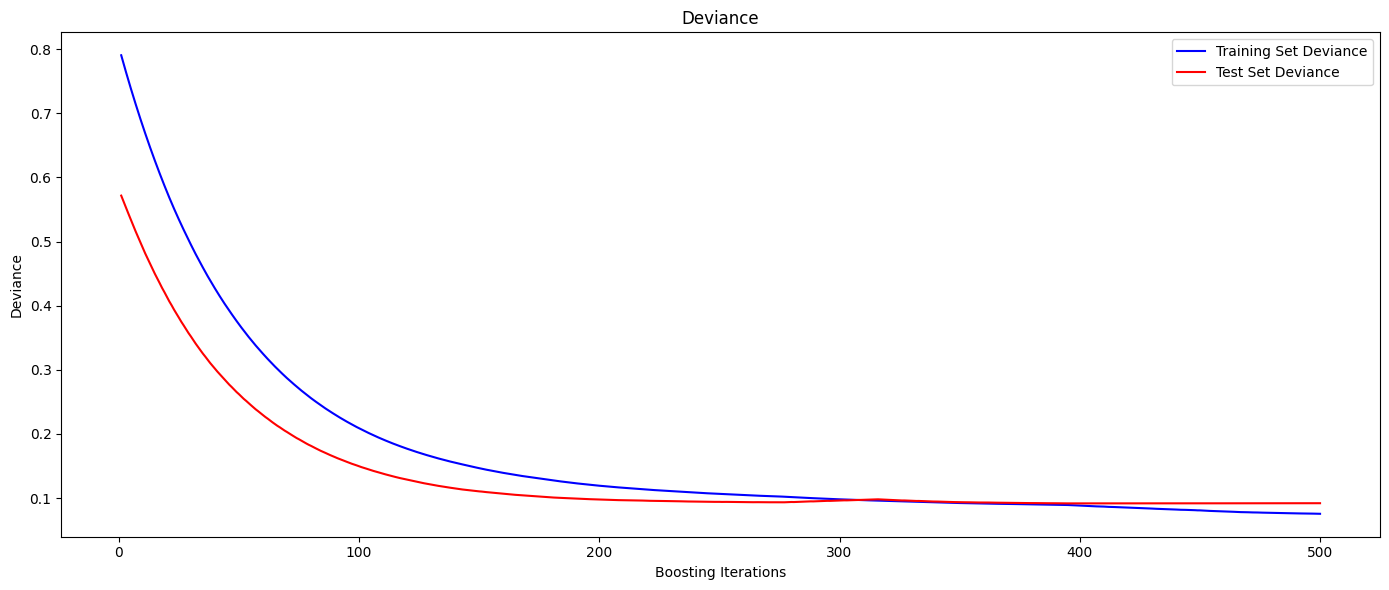

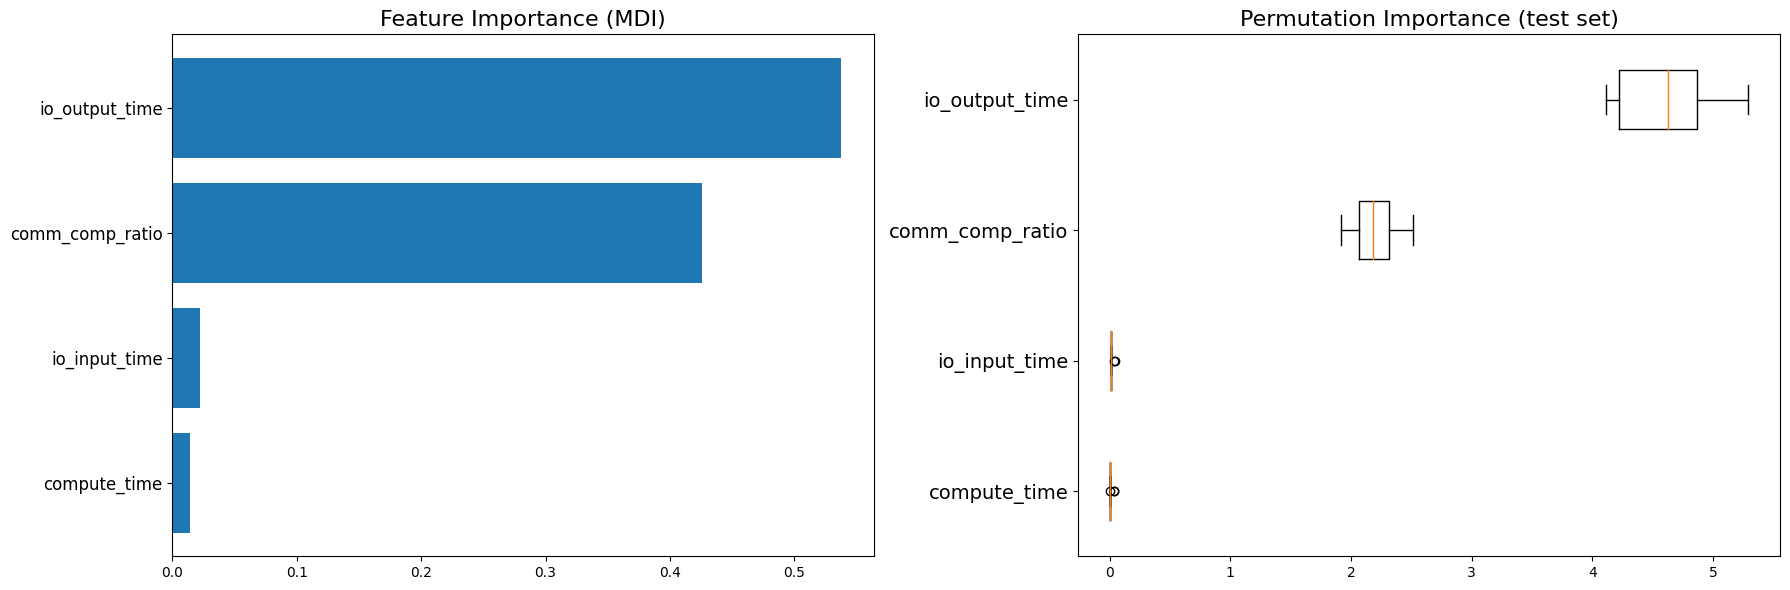

In [40]:

from sklearn import datasets, ensemble

X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target], test_size=0.1, random_state=12)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

erro = mean_absolute_percentage_error(y_test, reg.predict(X_test))
print("(MAPE) on test set: {:.4f}".format(erro))



test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(14, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()


feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df3.columns)[sorted_idx], fontsize=12)
plt.title("Feature Importance (MDI)", fontsize=16)

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)

# `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
# renamed to `tick_labels`. The following code handles this, but as a
# scikit-learn user you probably can write simpler code by using `labels=...`
# (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
tick_labels_parameter_name = (
    "tick_labels"
    if parse_version(matplotlib.__version__) >= parse_version("3.9")
    else "labels"
)
tick_labels_dict = {
    tick_labels_parameter_name: np.array(df3.columns)[sorted_idx]
}
plt.boxplot(result.importances[sorted_idx].T, vert=False, **tick_labels_dict)
plt.title("Permutation Importance (test set)", fontsize=16)
plt.yticks(fontsize=14)
fig.tight_layout()
plt.show()

### Linear Regressor

Coeficientes da Regressão Linear: [-3.46194712e-12  3.46194718e-12 -1.04433850e-04  3.22567031e-08]
Intercepto da Regressão Linear: 4.4998
Mean Absolute Percentage Error (MAPE) no conjunto de teste: 0.1304
Mean Squared Error (MSE) no conjunto de teste: 0.5172


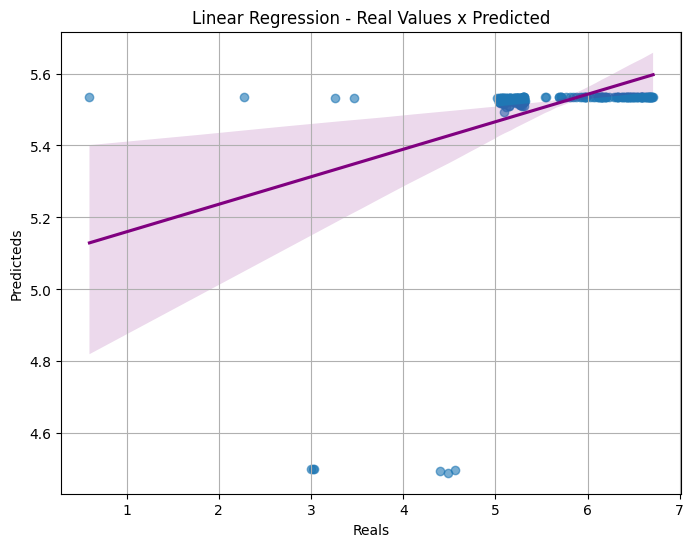

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target], test_size=0.1, random_state=12)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred_test = reg.predict(X_test)
erro_mape = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Coeficientes da Regressão Linear: {reg.coef_}")
print(f"Intercepto da Regressão Linear: {reg.intercept_:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) no conjunto de teste: {erro_mape:.4f}")
print(f"Mean Squared Error (MSE) no conjunto de teste: {mse_test:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_test, scatter_kws={'alpha':0.6}, line_kws={'color': 'purple'})
plt.xlabel("Reals")
plt.ylabel("Predicteds")
plt.title('Linear Regression - Real Values x Predicted')
plt.grid(True)
plt.show()

### Random Forest

Importância das Features (Random Forest):
  total_bytes_read: 0.0168
  total_bytes_write: 0.0153
  io_input_time: 0.5220
  io_output_time: 0.4458

Mean Absolute Percentage Error (MAPE) no conjunto de teste: 0.0351
Mean Squared Error (MSE) no conjunto de teste: 0.0901


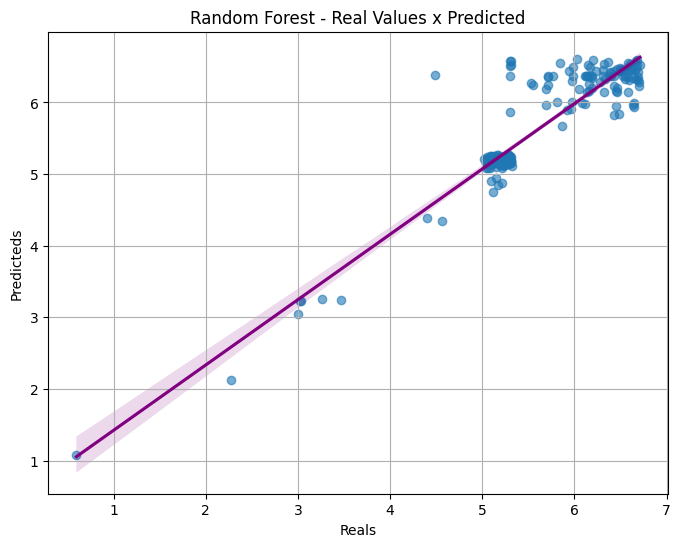

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target], test_size=0.1, random_state=12)

reg = RandomForestRegressor(n_estimators=500, random_state=12)
reg.fit(X_train, y_train)

y_pred_test = reg.predict(X_test)
erro_mape = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Importância das Features (Random Forest):")
for feature, importance in zip(features, reg.feature_importances_):
    print(f"  {feature}: {importance:.4f}")

print(f"\nMean Absolute Percentage Error (MAPE) no conjunto de teste: {erro_mape:.4f}")
print(f"Mean Squared Error (MSE) no conjunto de teste: {mse_test:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_test, scatter_kws={'alpha':0.6}, line_kws={'color': 'purple'})
plt.xlabel("Reals")
plt.ylabel("Predicteds")
plt.title('Random Forest - Real Values x Predicted')
plt.grid(True)
plt.show()

## Energy

In [43]:
target2 = 'power'

### Gradient Boosting Regressor

(MAPE) on test set: 0.0225


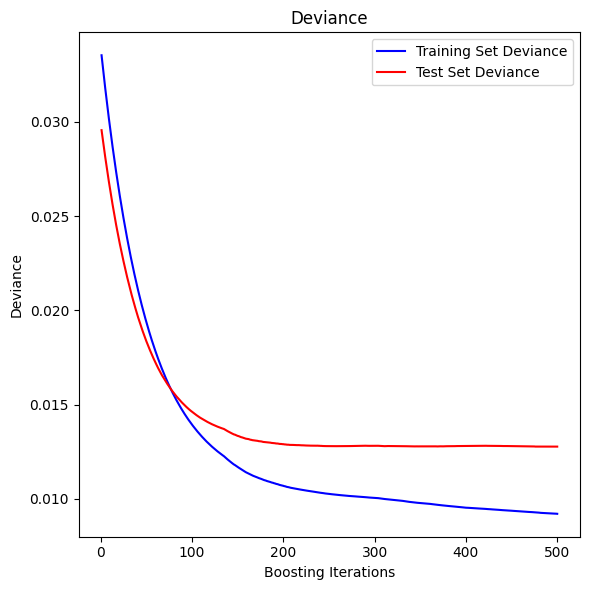

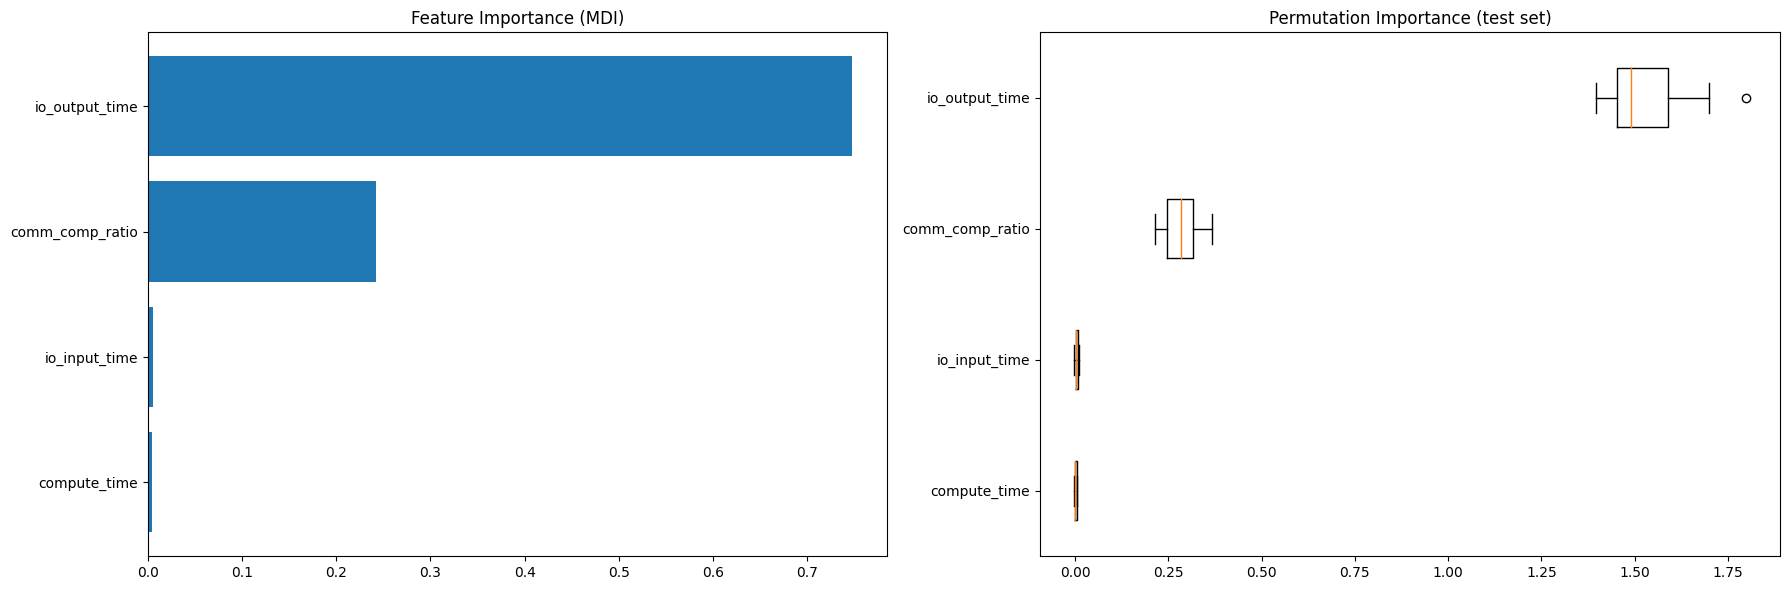

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target2], test_size=0.1, random_state=12)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

erro = mean_absolute_percentage_error(y_test, reg.predict(X_test))
print("(MAPE) on test set: {:.4f}".format(erro))



test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()


feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df3.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)

# `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
# renamed to `tick_labels`. The following code handles this, but as a
# scikit-learn user you probably can write simpler code by using `labels=...`
# (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
tick_labels_parameter_name = (
    "tick_labels"
    if parse_version(matplotlib.__version__) >= parse_version("3.9")
    else "labels"
)
tick_labels_dict = {
    tick_labels_parameter_name: np.array(df3.columns)[sorted_idx]
}
plt.boxplot(result.importances[sorted_idx].T, vert=False, **tick_labels_dict)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

Coeficientes da Regressão Linear: [-2.46119064e-12  2.46119065e-12 -3.56738599e-05  1.10186602e-08]
Intercepto da Regressão Linear: 3.4853
Mean Absolute Percentage Error (MAPE) no conjunto de teste: 0.0375
Mean Squared Error (MSE) no conjunto de teste: 0.0278


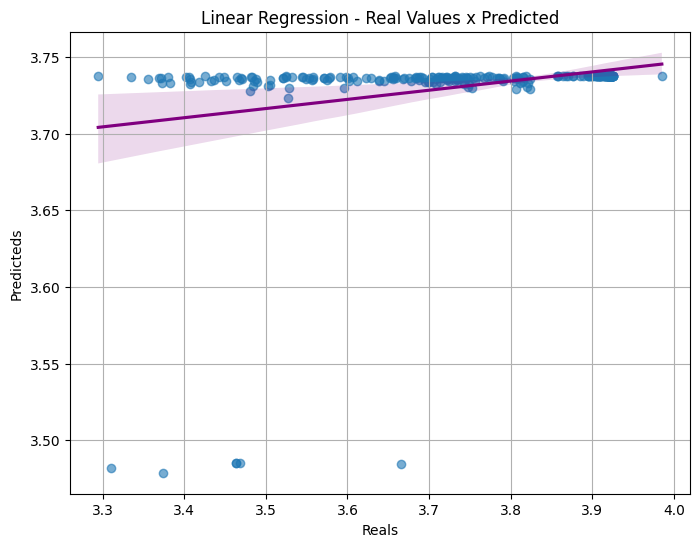

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target2], test_size=0.1, random_state=12)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred_test = reg.predict(X_test)
erro_mape = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Coeficientes da Regressão Linear: {reg.coef_}")
print(f"Intercepto da Regressão Linear: {reg.intercept_:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) no conjunto de teste: {erro_mape:.4f}")
print(f"Mean Squared Error (MSE) no conjunto de teste: {mse_test:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_test, scatter_kws={'alpha':0.6}, line_kws={'color': 'purple'})
plt.xlabel("Reals")
plt.ylabel("Predicteds")
plt.title('Linear Regression - Real Values x Predicted')
plt.grid(True)
plt.show()

Importância das Features (Random Forest):
  total_bytes_read: 0.0062
  total_bytes_write: 0.0048
  io_input_time: 0.6877
  io_output_time: 0.3013

Mean Absolute Percentage Error (MAPE) no conjunto de teste: 0.0246
Mean Squared Error (MSE) no conjunto de teste: 0.0156


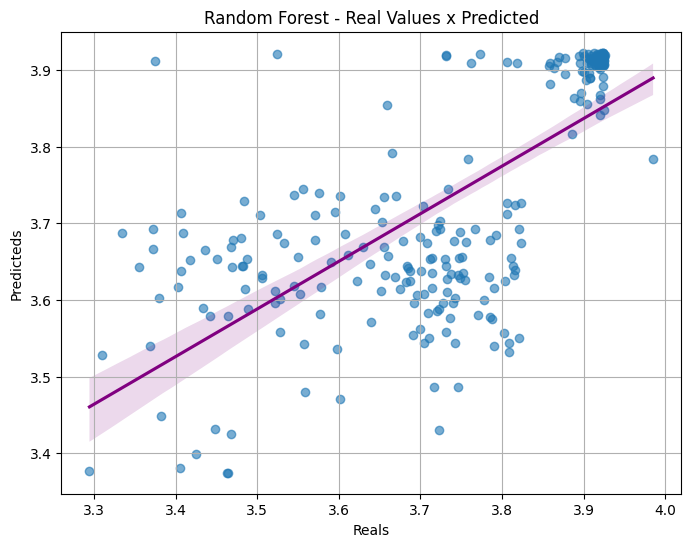

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target2], test_size=0.1, random_state=12)

reg = RandomForestRegressor(n_estimators=500, random_state=12)
reg.fit(X_train, y_train)

y_pred_test = reg.predict(X_test)
erro_mape = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Importância das Features (Random Forest):")
for feature, importance in zip(features, reg.feature_importances_):
    print(f"  {feature}: {importance:.4f}")

print(f"\nMean Absolute Percentage Error (MAPE) no conjunto de teste: {erro_mape:.4f}")
print(f"Mean Squared Error (MSE) no conjunto de teste: {mse_test:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_test, scatter_kws={'alpha':0.6}, line_kws={'color': 'purple'})
plt.xlabel("Reals")
plt.ylabel("Predicteds")
plt.title('Random Forest - Real Values x Predicted')
plt.grid(True)
plt.show()